# PLACEMENT PREDICTION

# Model

In [32]:
#importing libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

data = pd.read_csv('/home/user/Downloads/elective/project/placement/placed.csv', sep = ',', header = None, engine = 'python', encoding = 'latin-1')
data=data.drop([0],axis=1)
s=data
x = s[[3]].values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,100))
x_scaled = min_max_scaler.fit_transform(x)
df=pd.DataFrame(x_scaled)
s[[3]]=df[[0]]
s[[3]]=100-(s[[3]].round(2))
s[[4]]=s[[4]]*10
x = data.drop([5], axis=1)
y = data[5]

train_x,test_x,train_y,test_y = train_test_split(x,y, random_state = 25, stratify=y)
clf = KNN(n_neighbors = 2)
clf.fit(train_x, train_y)
test_predict = clf.predict(test_x)
k = f1_score(test_predict, test_y)
print('Test F1 Score    ', k )


Test F1 Score     0.8000000000000002


# Elbow method

Text(0.5, 1.0, 'Elbow Curve for test')

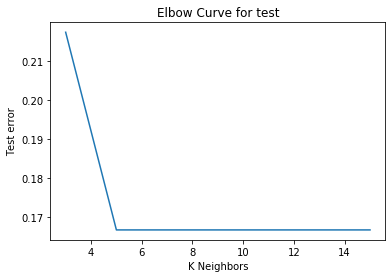

In [2]:
def Elbow(K):
    test_error = []
   
    #training model for evey value of K
    for i in K:
        #Instance oh KNN
        clf = KNN(n_neighbors = i)
        clf.fit(train_x, train_y)
        # Appending F1 scores to empty list claculated using the predictions
        tmp = clf.predict(test_x)
        tmp = f1_score(tmp,test_y)
        error = 1-tmp
        test_error.append(error)
    
    return test_error

k = range(3, 16, 2)
test = Elbow(k)

plt.plot(k, test)
plt.xlabel('K Neighbors')
plt.ylabel('Test error')
plt.title('Elbow Curve for test')


In [3]:
clf = KNN(n_neighbors = 5)
clf.fit(train_x, train_y)
test_predict = clf.predict(test_x)
k = f1_score(test_predict, test_y)
print('Test F1 Score    ', k )
print(test_y)


Test F1 Score     0.8333333333333333
45    1
32    1
2     1
4     1
17    0
44    1
40    0
28    1
22    1
33    0
24    1
51    0
13    1
50    1
Name: 5, dtype: int64


# Testing model accuracy

In [4]:
def testing_knn(n,clf):
    p=pd.read_csv(n, sep = ',', header = None, engine = 'python', encoding = 'latin-1')
    p=p.drop([0],axis=1)
    l = p[[3]].values #returns a numpy array
    min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,100))
    x_scaled = min_max_scaler.fit_transform(l)
    df=pd.DataFrame(x_scaled)
    p[[3]]=df[[0]]
    p[[3]]=100-(p[[3]].round(2))
    p[[4]]=p[[4]]*10
    t = p.drop([5], axis=1)
    u = p[5]
    clf.fit(train_x, train_y)
    test_predict1 = clf.predict(t)
    k = f1_score(test_predict1, u)
    print('Test F1 Score    ', k )

# Placement prediction of students in a dataset

In [49]:
def knn_dataset_prediction(n,clf):
    p=pd.read_csv(n, sep = ',', header = None, engine = 'python', encoding = 'latin-1')
    p=p.drop([0],axis=1)
    l = p[[3]].values #returns a numpy array
    min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,100))
    x_scaled = min_max_scaler.fit_transform(l)
    df=pd.DataFrame(x_scaled)
    p[[3]]=df[[0]]
    p[[3]]=100-(p[[3]].round(2))
    p[[4]]=p[[4]]*10
    clf.fit(train_x, train_y)
    test_predict1 = clf.predict(p)
    p["placement"]=test_predict1
    
    for i in range(len(p)):
        if(p["placement"][i]==1):
            p["placement"][i]="yes"
        else:
            p["placement"][i]="No"
    print(p)
    g=p["placement"].value_counts()
    g.to_frame()
    g.plot(kind='bar')
    plt.show()

# Placement prediction of a single student

In [50]:
def knn_student_prediction(placed,clf):
    p=placed
    #print(p)
    keam_min_rank=1
    keam_max_rank=50000
    p[[2]]=((p[[2]]-keam_min_rank)/(keam_max_rank-keam_min_rank))*100
    p[[2]]=100-(p[[2]].round(2))
    p[[3]]=p[[3]]*10
    print(p)
    clf.fit(train_x, train_y)
    test_predict1 = clf.predict(p)
    if(test_predict1==0):
        print("student is less likely to get placed")
    elif(test_predict1==1):
        print("student will get placed")
   

# Displaying the working of model

In [52]:
print("enter your data")
print("Press 0 for testing model accuracy")
print("Press 1 for entering dataset")
print("press 2 for entering individual student data:")
p=int(input())
if(p==0):
    n=input("Type a dataset's path:")
    testing_knn(n,clf)
elif(p==2):
    import csv
    with open('inputs.csv', 'w') as f:
        w = csv.writer(f, quoting=csv.QUOTE_ALL) 
        aisse=float(input("enter your 10th marks:"))
        hse=float(input("enter your 12th marks:"))
        keam_rank=float(input("enter your keam rank:"))
        cgpa=float(input("enter your cgpa:"))
        w.writerow([aisse,hse,keam_rank,cgpa])
    n= "/home/user/Downloads/elective/project/placement/inputs.csv"
    knn_student_prediction(n,clf)
elif(p==1):
    n=input("Type a dataset's path:")
    knn_dataset_prediction(n,clf)


enter your data
Press 0 for testing model accuracy
Press 1 for entering dataset
press 2 for entering individual student data:
0
Type a dataset's path:placed_test.csv
Test F1 Score     0.8636363636363635


enter your data
Press 0 for testing model accuracy
Press 1 for entering dataset
press 2 for entering individual student data:
1
Type a dataset's path:datasetin.csv
        1      2       3     4 placement
0    92.0  83.00   63.86  60.2        No
1    94.0  94.00   91.52  76.2       yes
2   100.0  98.00   91.34  90.3       yes
3    95.0  98.60   91.98  84.4       yes
4    88.0  90.00   88.21  80.8       yes
5    93.6  91.60   98.06  85.6       yes
6    92.0  68.00   87.18  72.8        No
7    92.0  93.80   81.84  74.3        No
8   100.0  94.00   83.93  68.2       yes
9   100.0  98.00   86.03  87.3       yes
10   99.0  95.50   88.81  60.3        No
11   98.0  93.00   81.46  76.1       yes
12   98.0  88.20   91.92  82.9       yes
13   95.2  90.00  100.00  85.6       yes
14  100.0  92.60   81.15  84.4       yes
15   71.0  70.00    0.00  80.2       yes
16   95.0  95.00   88.58  83.7       yes
17  100.0  90.00   92.16  72.3       yes
18   95.0  91.00   42.32  80.7        No
19   98.0  87.00

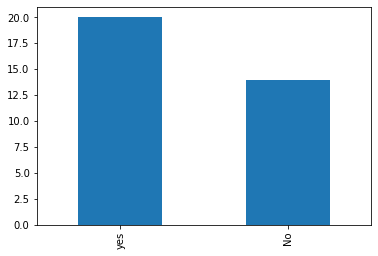

In [51]:
print("enter your data")
print("Press 0 for testing model accuracy")
print("Press 1 for entering dataset")
print("press 2 for entering individual student data:")
p=int(input())
if(p==0):
    n=input("Type a dataset's path:")
    testing_knn(n,clf)
elif(p==2):
    import csv
    with open('inputs.csv', 'w') as f:
        w = csv.writer(f, quoting=csv.QUOTE_ALL) 
        aisse=float(input("enter your 10th marks:"))
        hse=float(input("enter your 12th marks:"))
        keam_rank=float(input("enter your keam rank:"))
        cgpa=float(input("enter your cgpa:"))
        w.writerow([aisse,hse,keam_rank,cgpa])
    n= "/home/user/Downloads/elective/project/placement/inputs.csv"
    knn_student_prediction(n,clf)
elif(p==1):
    n=input("Type a dataset's path:")
    knn_dataset_prediction(n,clf)

In [54]:
print("enter your data")
print("Press 0 for testing model accuracy")
print("Press 1 for entering dataset")
print("press 2 for entering individual student data:")
p=int(input())
if(p==0):
    n=input("Type a dataset's path:")
    testing_knn(n,clf)
elif(p==2):
    aisse=float(input("enter your 10th marks:"))
    hse=float(input("enter your 12th marks:"))
    keam_rank=float(input("enter your keam rank:"))
    cgpa=float(input("enter your cgpa:"))
    details={0:aisse,1:hse,2:keam_rank,3:cgpa}
    placed=pd.DataFrame(details,index=[0])
    knn_student_prediction(placed,clf)
elif(p==1):
    n=input("Type a dataset's path:")
    knn_dataset_prediction(n,clf)

enter your data
Press 0 for testing model accuracy
Press 1 for entering dataset
press 2 for entering individual student data:
2
enter your 10th marks:90
enter your 12th marks:99
enter your keam rank:566
enter your cgpa:9.0
      0     1      2     3
0  90.0  99.0  98.87  90.0
student will get placed


In [8]:
print("enter your data")
print("Press 0 for testing model accuracy")
print("Press 1 for entering dataset")
print("press 2 for entering individual student data:")
p=int(input())
if(p==0):
    n=input("Type a dataset's path:")
    testing_knn(n,clf)
elif(p==2):
    aisse=float(input("enter your 10th marks:"))
    print(aisse)
    hse=float(input("enter your 12th marks:"))
    keam_rank=float(input("enter your keam rank:"))
    cgpa=float(input("enter your cgpa:"))
    details={0:aisse,1:hse,2:keam_rank,3:cgpa}
    placed=pd.DataFrame(details,index=[0])
    knn_student_prediction(placed,clf)
elif(p==1):
    n=input("Type a dataset's path:")
    knn_dataset_prediction(n,clf)

enter your data
Press 0 for testing model accuracy
Press 1 for entering dataset
press 2 for entering individual student data:
2
enter your 10th marks:70
70.0
enter your 12th marks:69
enter your keam rank:21000
enter your cgpa:7.0
          2
0  41.99884
      0     1     2     3
0  70.0  69.0  58.0  70.0
student is less likely to be placed
